In [89]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']  = (10,6)

In [90]:
df = pd.read_csv('heights.csv')
df.sample(5)

,gender,height
4041,Male,66.626519
8719,Female,67.735823
558,Male,70.782228
7421,Female,66.499867
812,Male,66.682243


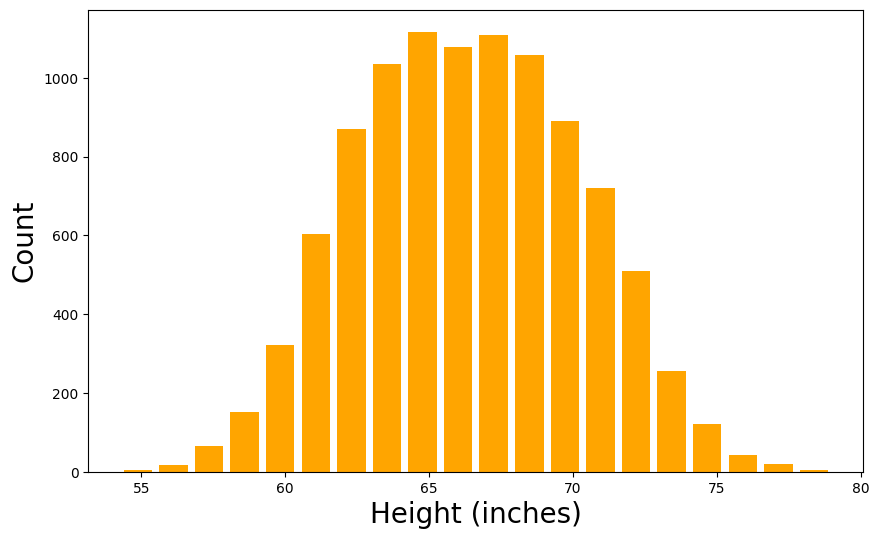

In [91]:
plt.hist(df.height,bins=20, rwidth=0.8, color='orange') # bins: number of bars / 
plt.xlabel('Height (inches)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

In [92]:
df.height.min()

54.26313333

In [93]:
df.height.max()

78.99874235

In [94]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

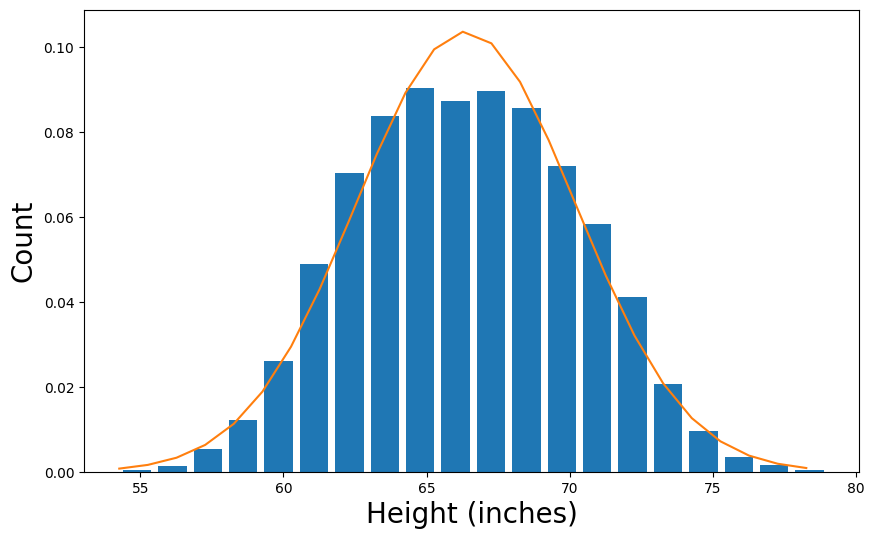

In [95]:
from scipy.stats import norm
plt.hist(df.height,bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)', fontsize=20)
plt.ylabel('Count', fontsize=20)

rng = np.arange(df.height.min(),df.height.max())
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()


In [96]:
df.height.mean()

66.367559754866

In [97]:
df.height.std()

3.847528120795573

In [98]:
upper_limit = df.height.mean() + 3 * df.height.std() 
upper_limit

77.91014411725271

In [99]:
lower_limit = df.height.mean() - 3 * df.height.std() 
lower_limit

54.824975392479274

In [100]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [101]:
df_no_outlir_stf_dev = df[(df.height < upper_limit) & (df.height > lower_limit)]
df_no_outlir_stf_dev.shape

(9993, 2)

In [102]:
df.shape[0] - df_no_outlir_stf_dev.shape[0] # the outlier i removed

7

In [103]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head(10)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
5,Male,67.253016,0.230136
6,Male,68.785081,0.628331
7,Male,68.348516,0.514865
8,Male,67.018950,0.169301
9,Male,63.456494,-0.756607


In [104]:
# How it claculate Z-score
# x: data point  /  mean: mean of the height /  std: standard deviation of height
# z = (x - mean) / std         
(73.847017-66.367560) / 3.847528

1.9439642804418829

In [105]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [106]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [107]:
df[(df.zscore > 3) | (df.zscore < -3)]


,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [108]:
df_no_outlir_stf_dev = df[(df.zscore < 3) & (df.zscore > -3)]
df_no_outlir_stf_dev.shape

(9993, 3)

In [ ]:
df.shape[0] - df_no_outlir_stf_dev.shape[0] # 7 outlier removed in total

7